Disciplina: Mineração de Dados

Professor: Wilson Castello Branco Neto

Aula 4 - Pré-Processamento de Dados - Parte 2

Nome: Patriki de Oliveira Góss

Dataset: Salary dataset based on country and race

Disponível em: https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race

Parte 0 - Carregamento e limpeza do dataset

Limpeza dos dados conforme conteúdo apresentado na aula 3.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

df = pd.read_csv('Salary_Data_Based_country_and_race.csv')
df.drop('Unnamed: 0',axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
li = df['Salary'].mean() - 2 * df['Salary'].std()
ls = df['Salary'].mean() + 2 * df['Salary'].std()
df = df[(df['Salary']>=li) & (df['Salary']<=ls)]
df = df[(df['Age'] - df['Years of Experience'])>=16]
df = df[(df['Gender']=='Male') | (df['Gender']=='Female')]
df.loc[df['Education Level'] == 'phD', 'Education Level'] = 'PhD'
df.loc[df['Education Level'] == "Bachelor's Degree", 'Education Level'] = "Bachelor's"
df.loc[df['Education Level'] == "Master's Degree",'Education Level'] = "Master's"
# Os nomes das colunas com espaços em branco foram alterados para simplificar
df.rename({'Education Level': 'Education'}, axis=1, inplace=True)
df.rename({'Years of Experience': 'Experience'}, axis=1, inplace=True)
# A coluna Job Title foi excluída em função da falta de padronização dos seus valores
df.drop('Job Title',axis='columns', inplace=True)
df

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,5.0,90000.0,UK,White
1,28.0,Female,Master's,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's,6.0,75000.0,Canada,Asian
6699,49.0,Female,PhD,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's,4.0,55000.0,China,Chinese


In [2]:
df.describe(include="all")

,Age,Gender,Education,Experience,Salary,Country,Race
count,5118.000000,5118,5118,5118.000000,5118.000000,5118,5118
unique,NaN,2,4,NaN,NaN,5,10
top,NaN,Male,Bachelor's,NaN,NaN,USA,White
freq,NaN,2779,2251,NaN,NaN,1069,1504
mean,33.929660,NaN,NaN,8.265631,113722.941579,NaN,NaN
std,7.703118,NaN,NaN,6.165074,51858.887848,NaN,NaN
min,21.000000,NaN,NaN,0.000000,25000.000000,NaN,NaN
25%,28.000000,NaN,NaN,3.000000,68118.000000,NaN,NaN
50%,32.000000,NaN,NaN,7.000000,110707.000000,NaN,NaN
75%,39.000000,NaN,NaN,12.000000,160000.000000,NaN,NaN


Parte 1 - Transformação: Padronização e Codificação de variáveis numéricas

Faz uma cópia do dataframe para que o dataframe original seja mantido para as outras partes do exemplo.

In [3]:
df2 = df.copy()

Padronização de valores categóricos

In [4]:
df2['Country'] = df2['Country'].str.upper()
df2['Gender'] = df2['Gender'].str.lower()

df2

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,male,Bachelor's,5.0,90000.0,UK,White
1,28.0,female,Master's,3.0,65000.0,USA,Hispanic
2,45.0,male,PhD,15.0,150000.0,CANADA,White
3,36.0,female,Bachelor's,7.0,60000.0,USA,Hispanic
4,52.0,male,Master's,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...
6698,37.0,male,Bachelor's,6.0,75000.0,CANADA,Asian
6699,49.0,female,PhD,20.0,200000.0,UK,Mixed
6700,32.0,male,High School,3.0,50000.0,AUSTRALIA,Australian
6701,30.0,female,Bachelor's,4.0,55000.0,CHINA,Chinese


Mapeamento direto usando a classe LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df2['Gender']=le.fit_transform(df2['Gender'])
df2['Education']=le.fit_transform(df2['Education'])
df2['Country']=le.fit_transform(df2['Country'])
df2['Race']=le.fit_transform(df2['Race'])

Visualização do datraframe original e do dataframe convertido com o LabelEncoder

In [6]:
df

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,5.0,90000.0,UK,White
1,28.0,Female,Master's,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's,6.0,75000.0,Canada,Asian
6699,49.0,Female,PhD,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's,4.0,55000.0,China,Chinese


In [7]:
df2

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,1,0,5.0,90000.0,3,9
1,28.0,0,2,3.0,65000.0,4,5
2,45.0,1,3,15.0,150000.0,1,9
3,36.0,0,0,7.0,60000.0,4,5
4,52.0,1,2,20.0,200000.0,4,1
...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1
6699,49.0,0,3,20.0,200000.0,3,7
6700,32.0,1,1,3.0,50000.0,0,2
6701,30.0,0,0,4.0,55000.0,2,4


Treinamento de um modelo de regressão linear com todos os atributos e apresentação do r2 obtido após a codificação com o LabelEncoder.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df2.drop(['Salary'] ,axis='columns')
y = df2['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6607095299161199


Representação binária usando a função get_dummies do Pandas.

A biblioteca scikit-learn disponibiliza a classe OneHotEncoder que realiza a mesma tarefa. Embora possua algumas vantagens, o uso do OneHotEncoder é mais trabalhoso e não será apresentado neste notebook.

In [9]:
df3 = df.copy()
df3 = pd.get_dummies(df3, columns = ['Gender','Education','Country','Race'])
df3

,Age,Experience,Salary,Gender_Female,Gender_Male,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,Country_Australia,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,5.0,90000.0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,28.0,3.0,65000.0,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,45.0,15.0,150000.0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,36.0,7.0,60000.0,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,52.0,20.0,200000.0,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,37.0,6.0,75000.0,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6699,49.0,20.0,200000.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6700,32.0,3.0,50000.0,False,True,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
6701,30.0,4.0,55000.0,True,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Treinamento de um modelo de regressão linear com todos os atributos e apresentação do r2 obtido após a codificação com o get_dummies.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df3.drop(['Salary'] ,axis='columns')
y = df3['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.69813088328833


Parte 2 - Transformação: Normalização

Utiliza o df2 que possui os atributos categóricos transformados em numéricos por meio do labelEncoder

In [12]:
df2

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,1,0,5.0,90000.0,3,9
1,28.0,0,2,3.0,65000.0,4,5
2,45.0,1,3,15.0,150000.0,1,9
3,36.0,0,0,7.0,60000.0,4,5
4,52.0,1,2,20.0,200000.0,4,1
...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1
6699,49.0,0,3,20.0,200000.0,3,7
6700,32.0,1,1,3.0,50000.0,0,2
6701,30.0,0,0,4.0,55000.0,2,4


Método MinMax

In [13]:
from sklearn.preprocessing import MinMaxScaler

#O parâmetro passado no construtor define os limites mínimos e máximos a serem
#usados, por meio de uma tupla. Se for deixado em branco, o valor padrão é (0, 1)

transform = MinMaxScaler((0,1))
# Transforma um vetor de uma dimensão em outro com várias linhas de uma única coluna
df2['Idade MinMax'] = transform.fit_transform(df2['Age'].values.reshape(-1,1))
df2['xP MinMax'] = transform.fit_transform(df2['Experience'].values.reshape(-1,1))

df2

,Age,Gender,Education,Experience,Salary,Country,Race,Idade MinMax,xP MinMax
0,32.0,1,0,5.0,90000.0,3,9,0.268293,0.147059
1,28.0,0,2,3.0,65000.0,4,5,0.170732,0.088235
2,45.0,1,3,15.0,150000.0,1,9,0.585366,0.441176
3,36.0,0,0,7.0,60000.0,4,5,0.365854,0.205882
4,52.0,1,2,20.0,200000.0,4,1,0.756098,0.588235
...,...,...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1,0.390244,0.176471
6699,49.0,0,3,20.0,200000.0,3,7,0.682927,0.588235
6700,32.0,1,1,3.0,50000.0,0,2,0.268293,0.088235
6701,30.0,0,0,4.0,55000.0,2,4,0.219512,0.117647


Crie o histograma de frequência para os variáveis Idade (Age) e Idade MinMax Pesquise como apresentar os dois gráficos na mesma figura. Em seguida, treine um modelo de regressão linear e apresente o r2 obtido, substituindo os atributos idade (Age) e tempo de experiência originais pelos atributos resultantes da transformação MinMax. Compare se há diferença no resultado gerado por modelo com o gerado pelo modelo treinado com os parâmetros originais.

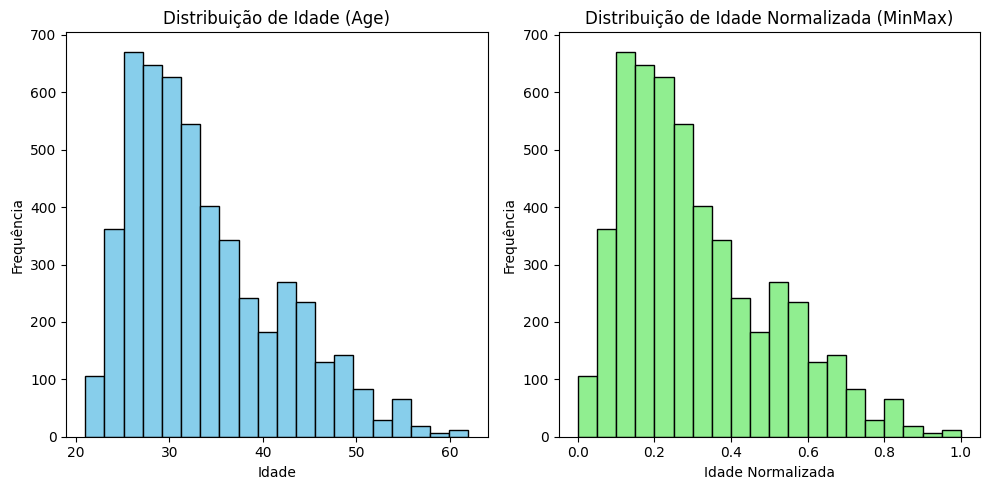

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

# Histograma de Age
plt.subplot(1,2,1)
plt.hist(df2['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Histograma de Idade MinMax
plt.subplot(1,2,2)
plt.hist(df2['Idade MinMax'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribuição de Idade Normalizada (MinMax)')
plt.xlabel('Idade Normalizada')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

# Cópia para não alterar o original
df4 = df2.copy()

# Substitui Age e Experience pelos normalizados
df4 = df4.drop(['Age', 'Experience'], axis=1)

# Define X e y
X = df4.drop(['Salary'], axis=1)
y = df4['Salary']

# Divide os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

# Modelo
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)

# Predição e avaliação
y_pred = modelo.predict(X_test)
r2_minmax = r2_score(y_test, y_pred)
print("R² com variáveis normalizadas:", r2_minmax)


R² com variáveis normalizadas: 0.6607095299161196


In [17]:
print("R² original:", r2)
print("R² com MinMax:", r2_minmax)

if r2_minmax > r2:
    print("O modelo com normalização apresentou desempenho ligeiramente melhor.")
elif r2_minmax < r2:
    print("O modelo com normalização teve desempenho um pouco pior.")
else:
    print("O desempenho foi idêntico.")


R² original: 0.69813088328833
R² com MinMax: 0.6607095299161196
O modelo com normalização teve desempenho um pouco pior.


Método Interquartil ou Robusto

In [17]:
from sklearn.preprocessing import RobustScaler

transform = RobustScaler()
# Transforma um vetor de uma dimensão em outro com várias linhas de uma única coluna
df2['Idade Robust'] = transform.fit_transform(df2['Age'].values.reshape(-1,1))
df2['xP Robust'] = transform.fit_transform(df2['Experience'].values.reshape(-1,1))
df2

,Age,Gender,Education,Experience,Salary,Country,Race,Idade MinMax,xP MinMax,Idade Robust,xP Robust
0,32.0,1,0,5.0,90000.0,3,9,0.268293,0.147059,0.000000,-0.222222
1,28.0,0,2,3.0,65000.0,4,5,0.170732,0.088235,-0.363636,-0.444444
2,45.0,1,3,15.0,150000.0,1,9,0.585366,0.441176,1.181818,0.888889
3,36.0,0,0,7.0,60000.0,4,5,0.365854,0.205882,0.363636,0.000000
4,52.0,1,2,20.0,200000.0,4,1,0.756098,0.588235,1.818182,1.444444
...,...,...,...,...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1,0.390244,0.176471,0.454545,-0.111111
6699,49.0,0,3,20.0,200000.0,3,7,0.682927,0.588235,1.545455,1.444444
6700,32.0,1,1,3.0,50000.0,0,2,0.268293,0.088235,0.000000,-0.444444
6701,30.0,0,0,4.0,55000.0,2,4,0.219512,0.117647,-0.181818,-0.333333


Crie o histograma de frequência para os variáveis Idade (Age) e Idade Robust na mesma figura. Em seguida, treine um modelo de regressão linear e apresente o r2 obtido, substituindo os atributos idade (Age) e tempo de experiência originais pelos atributos resultantes da transformação Robust. Compare se há diferença no resultado gerado por modelo com o gerado pelo modelo treinado com os parâmetros originais.

In [18]:
from sklearn.preprocessing import RobustScaler

# Cria o transformador
robust = RobustScaler()

# Copia o DataFrame
df_robust = df2.copy()

# Cria novas colunas com os valores transformados
df_robust['Idade Robust'] = robust.fit_transform(df_robust['Age'].values.reshape(-1,1))
df_robust['xP Robust'] = robust.fit_transform(df_robust['Experience'].values.reshape(-1,1))

df_robust.head()


,Age,Gender,Education,Experience,Salary,Country,Race,Idade MinMax,xP MinMax,Idade Robust,xP Robust
0,32.0,1,0,5.0,90000.0,3,9,0.268293,0.147059,0.000000,-0.222222
1,28.0,0,2,3.0,65000.0,4,5,0.170732,0.088235,-0.363636,-0.444444
2,45.0,1,3,15.0,150000.0,1,9,0.585366,0.441176,1.181818,0.888889
3,36.0,0,0,7.0,60000.0,4,5,0.365854,0.205882,0.363636,0.000000
4,52.0,1,2,20.0,200000.0,4,1,0.756098,0.588235,1.818182,1.444444


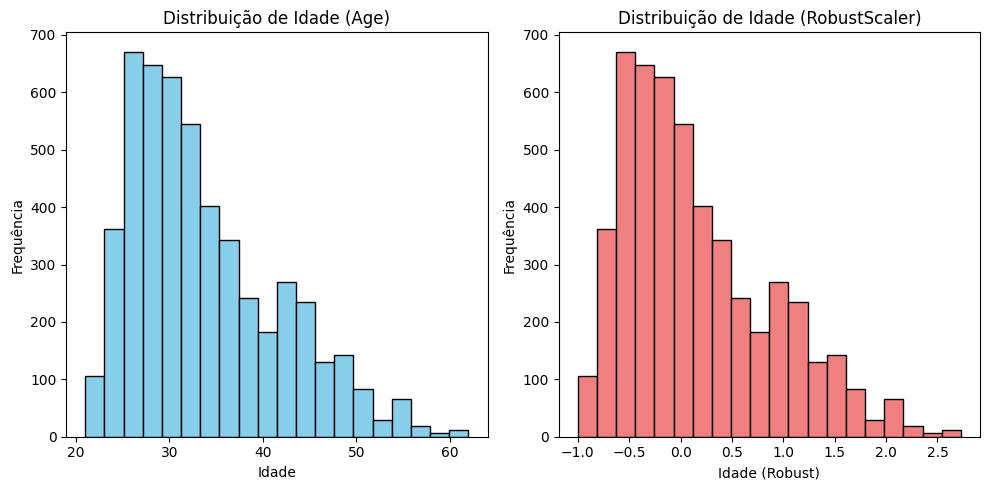

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Histograma da Idade original
plt.subplot(1,2,1)
plt.hist(df_robust['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Histograma da Idade com RobustScaler
plt.subplot(1,2,2)
plt.hist(df_robust['Idade Robust'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribuição de Idade (RobustScaler)')
plt.xlabel('Idade (Robust)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

# Cria uma cópia para o modelo
df_model_robust = df_robust.copy()

# Remove colunas originais
df_model_robust = df_model_robust.drop(['Age', 'Experience'], axis=1)

# Define X e y
X = df_model_robust.drop(['Salary'], axis=1)
y = df_model_robust['Salary']

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

# Cria e treina o modelo
modelo_robust = linear_model.LinearRegression()
modelo_robust.fit(X_train, y_train)

# Predição e avaliação
y_pred = modelo_robust.predict(X_test)
r2_robust = r2_score(y_test, y_pred)
print("R² com variáveis normalizadas pelo RobustScaler:", r2_robust)


R² com variáveis normalizadas pelo RobustScaler: 0.6607095299161199


In [23]:
print("R² original:", r2)
print("R² com RobustScaler:", r2_robust)

if r2_robust > r2:
    print("✅ O modelo com RobustScaler apresentou desempenho melhor.")
elif r2_robust < r2:
    print("⚠️ O modelo com RobustScaler teve desempenho ligeiramente pior.")
else:
    print("➖ O desempenho foi igual entre os modelos.")


R² original: 0.69813088328833
R² com RobustScaler: 0.6607095299161199
⚠️ O modelo com RobustScaler teve desempenho ligeiramente pior.


Método z-score

In [18]:
from sklearn.preprocessing import StandardScaler

transform = StandardScaler()
# Transforma um vetor de uma dimensão em outro com várias linhas de uma única coluna
df2['Idade z_score'] = transform.fit_transform(df2['Age'].values.reshape(-1,1))
df2['xP z_score'] = transform.fit_transform(df2['Experience'].values.reshape(-1,1))
df2

,Age,Gender,Education,Experience,Salary,Country,Race,Idade MinMax,xP MinMax,Idade Robust,xP Robust,Idade z_score,xP z_score
0,32.0,1,0,5.0,90000.0,3,9,0.268293,0.147059,0.000000,-0.222222,-0.250528,-0.529750
1,28.0,0,2,3.0,65000.0,4,5,0.170732,0.088235,-0.363636,-0.444444,-0.769849,-0.854190
2,45.0,1,3,15.0,150000.0,1,9,0.585366,0.441176,1.181818,0.888889,1.437265,1.092449
3,36.0,0,0,7.0,60000.0,4,5,0.365854,0.205882,0.363636,0.000000,0.268793,-0.205311
4,52.0,1,2,20.0,200000.0,4,1,0.756098,0.588235,1.818182,1.444444,2.346077,1.903548
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1,0.390244,0.176471,0.454545,-0.111111,0.398623,-0.367530
6699,49.0,0,3,20.0,200000.0,3,7,0.682927,0.588235,1.545455,1.444444,1.956586,1.903548
6700,32.0,1,1,3.0,50000.0,0,2,0.268293,0.088235,0.000000,-0.444444,-0.250528,-0.854190
6701,30.0,0,0,4.0,55000.0,2,4,0.219512,0.117647,-0.181818,-0.333333,-0.510189,-0.691970


Crie o histograma de frequência para os variáveis Idade (Age) e Idade z-score na mesma figura. Em seguida, treine um modelo de regressão linear e apresente o r2 obtido, substituindo os atributos idade (Age) e tempo de experiência originais pelos atributos resultantes da transformação z-score. Compare se há diferença no resultado gerado por modelo com o gerado pelo modelo treinado com os parâmetros originais.

In [24]:
from sklearn.preprocessing import StandardScaler

# Cria o transformador
zscore = StandardScaler()

# Copia o DataFrame base
df_z = df2.copy()

# Aplica a transformação e cria novas colunas
df_z['Idade z-score'] = zscore.fit_transform(df_z['Age'].values.reshape(-1,1))
df_z['xP z-score'] = zscore.fit_transform(df_z['Experience'].values.reshape(-1,1))

df_z.head()


,Age,Gender,Education,Experience,Salary,Country,Race,Idade MinMax,xP MinMax,Idade Robust,xP Robust,Idade z_score,xP z_score,Idade z-score,xP z-score
0,32.0,1,0,5.0,90000.0,3,9,0.268293,0.147059,0.000000,-0.222222,-0.250528,-0.529750,-0.250528,-0.529750
1,28.0,0,2,3.0,65000.0,4,5,0.170732,0.088235,-0.363636,-0.444444,-0.769849,-0.854190,-0.769849,-0.854190
2,45.0,1,3,15.0,150000.0,1,9,0.585366,0.441176,1.181818,0.888889,1.437265,1.092449,1.437265,1.092449
3,36.0,0,0,7.0,60000.0,4,5,0.365854,0.205882,0.363636,0.000000,0.268793,-0.205311,0.268793,-0.205311
4,52.0,1,2,20.0,200000.0,4,1,0.756098,0.588235,1.818182,1.444444,2.346077,1.903548,2.346077,1.903548


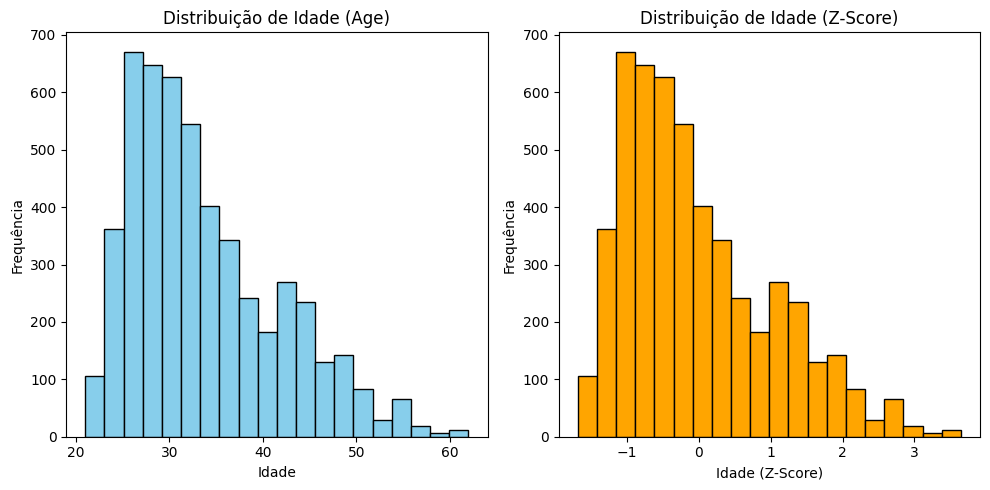

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Histograma da Idade original
plt.subplot(1,2,1)
plt.hist(df_z['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Histograma da Idade com Z-Score
plt.subplot(1,2,2)
plt.hist(df_z['Idade z-score'], bins=20, color='orange', edgecolor='black')
plt.title('Distribuição de Idade (Z-Score)')
plt.xlabel('Idade (Z-Score)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


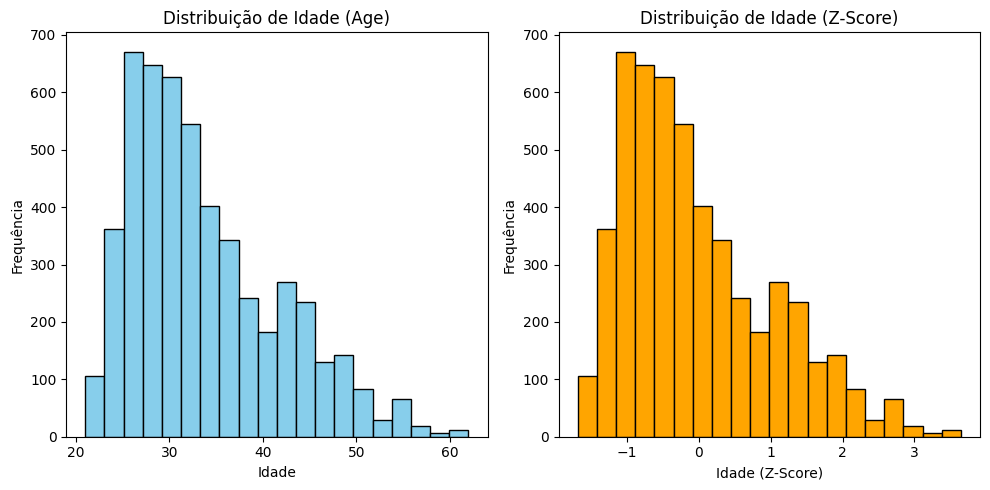

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Histograma da Idade original
plt.subplot(1,2,1)
plt.hist(df_z['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Histograma da Idade com Z-Score
plt.subplot(1,2,2)
plt.hist(df_z['Idade z-score'], bins=20, color='orange', edgecolor='black')
plt.title('Distribuição de Idade (Z-Score)')
plt.xlabel('Idade (Z-Score)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

# Cria uma cópia para o modelo
df_model_z = df_z.copy()

# Remove colunas originais
df_model_z = df_model_z.drop(['Age', 'Experience'], axis=1)

# Define X e y
X = df_model_z.drop(['Salary'], axis=1)
y = df_model_z['Salary']

# Divide os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

# Cria e treina o modelo
modelo_z = linear_model.LinearRegression()
modelo_z.fit(X_train, y_train)

# Predição e avaliação
y_pred = modelo_z.predict(X_test)
r2_z = r2_score(y_test, y_pred)
print("R² com variáveis padronizadas (Z-Score):", r2_z)


R² com variáveis padronizadas (Z-Score): 0.6607095299161199


In [28]:
print("R² original:", r2)
print("R² com Z-Score:", r2_z)

if r2_z > r2:
    print("✅ O modelo com Z-Score apresentou desempenho melhor.")
elif r2_z < r2:
    print("⚠️ O modelo com Z-Score teve desempenho ligeiramente pior.")
else:
    print("➖ O desempenho foi idêntico.")


R² original: 0.69813088328833
R² com Z-Score: 0.6607095299161199
⚠️ O modelo com Z-Score teve desempenho ligeiramente pior.


Parte 3 - Seleção de atributos usando a abordagem de Filtro com a escolha dos atributos por meio do ganho de informação

Crie uma cópia do dataframe original chamada df4 e realize a codificação dos valores categóricos usando a classe LabelEncoder. Em seguida, apresente o dataframe gerado.

In [3]:
from sklearn.preprocessing import LabelEncoder


df4 = df.copy()
le = LabelEncoder()
df4['Gender']=le.fit_transform(df4['Gender'])
df4['Education']=le.fit_transform(df4['Education'])
df4['Country']=le.fit_transform(df4['Country'])
df4['Race']=le.fit_transform(df4['Race'])
df4

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,1,0,5.0,90000.0,3,9
1,28.0,0,2,3.0,65000.0,4,5
2,45.0,1,3,15.0,150000.0,1,9
3,36.0,0,0,7.0,60000.0,4,5
4,52.0,1,2,20.0,200000.0,4,1
...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1
6699,49.0,0,3,20.0,200000.0,3,7
6700,32.0,1,1,3.0,50000.0,0,2
6701,30.0,0,0,4.0,55000.0,2,4


Treine um modelo de regressão linear com todos os atributos e apresente o r2 para fins de comparação posterior.

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split


X = df4.drop(["Salary"] ,axis="columns")
y = df4['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)



0.6607095299161199


Criação de uma árvore de regressão para calcular o ganho de informação de cada um dos atributos

In [5]:
from sklearn.tree import DecisionTreeRegressor

X = df4.drop(['Salary'] ,axis='columns')
y = df4['Salary']
modelo = DecisionTreeRegressor(criterion='squared_error', max_depth=7, random_state=42)
modelo.fit(X, y)
print(modelo.feature_names_in_)
print(modelo.feature_importances_)

['Age' 'Gender' 'Education' 'Experience' 'Country' 'Race']
[7.52041872e-02 1.33735955e-02 4.10627674e-02 8.69049435e-01
 1.06788300e-03 2.42132233e-04]


Considerando o ganho de informação pode-se definir a seguinte ordem de importância dos atributos.

Tempo de experiência (0.869)
Idade (0.075)
Nível educacional (0.041)
Gênero (0.013)
País (0.001)
Raça (0.000)

Dois critérios podem ser escolhidos para definir quais atributos farão parte do modelo:

Uma quantidade fixa de atributos.
Todos os atributos cujo ganho de informação seja superior a um limite pré-estabelecido.
Neste exemplo, serão selecionados os três atributos com maior ganho de informação (50% da quantidade de atributos no dataset original).

Treine um modelo de regressão linear com os três atributos com maior ganho de informação, apresente o r2 e conclua se a exclusão dos demais atributos foi positiva ou não.

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split


X = df4.drop(["Salary", "Race", "Country", "Gender"], axis="columns")
y = df4['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(r2)

0.6565173393835538


Crie outra cópia do dataframe original chamada df5 e realize a codificação dos valores categóricos usando o método get_dummies. Em seguida, apresente o dataframe gerado.

In [7]:
df5 = df.copy()
df5 = pd.get_dummies(df5, columns = ['Gender','Education','Country','Race'])
df5

,Age,Experience,Salary,Gender_Female,Gender_Male,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,Country_Australia,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,5.0,90000.0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,28.0,3.0,65000.0,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,45.0,15.0,150000.0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,36.0,7.0,60000.0,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,52.0,20.0,200000.0,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,37.0,6.0,75000.0,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6699,49.0,20.0,200000.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6700,32.0,3.0,50000.0,False,True,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
6701,30.0,4.0,55000.0,True,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Treine um modelo com todos os atributos gerados e apresente o r2 para posterior comparação.

In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split


X = df5.drop(["Salary",], axis="columns")
y = df5['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(r2)

0.69813088328833


Treinamento da árvore de decisão e apresentação da "importância" de cada atributo após a codificação com o get_dummies.

In [9]:
from sklearn.tree import DecisionTreeRegressor

X = df5.drop(['Salary'] ,axis='columns')
y = df5['Salary']
modelo = DecisionTreeRegressor(criterion='squared_error', max_depth=7, random_state=42)
modelo.fit(X, y)
print(modelo.feature_names_in_)
print(modelo.feature_importances_)

['Age' 'Experience' 'Gender_Female' 'Gender_Male' "Education_Bachelor's"
 'Education_High School' "Education_Master's" 'Education_PhD'
 'Country_Australia' 'Country_Canada' 'Country_China' 'Country_UK'
 'Country_USA' 'Race_African American' 'Race_Asian' 'Race_Australian'
 'Race_Black' 'Race_Chinese' 'Race_Hispanic' 'Race_Korean' 'Race_Mixed'
 'Race_Welsh' 'Race_White']
[6.97560678e-02 8.65722342e-01 3.33784958e-03 4.44777234e-03
 1.42720347e-02 1.94439153e-02 1.15992354e-02 8.46257391e-03
 0.00000000e+00 0.00000000e+00 3.25960361e-04 1.01717818e-04
 8.51490310e-04 3.03056307e-06 1.55591220e-09 0.00000000e+00
 0.00000000e+00 1.21824579e-03 1.96537015e-04 5.05630766e-06
 2.34622961e-04 0.00000000e+00 2.15459504e-05]


Treine um modelo de regressão linear com todos os atributos com ganho de informação superior a 0.001, apresente o r2 e conclua se a exclusão dos demais atributos foi positiva ou não, são eles:

Idade (0.07)
Tempo de Experiência (0.866)
Gender_Female (0.003)
Gender_Male (0.004)
Education_Bachelor's (0.014)
Education_High School (0.019)
Education_Master's (0.012)
Education_PhD (0.008)

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split


X = df5.drop(["Salary", "Country_Australia", "Country_Canada", "Country_China", "Country_UK", "Country_USA", "Race_African American", "Race_Asian","Race_Australian", "Race_Black","Race_Chinese", "Race_Hispanic", "Race_Korean", "Race_Mixed", "Race_Welsh", "Race_White" ], axis="columns")
y = df5['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(r2)

0.6997507578004316


Parte 4 Seleção de atributos usando a abordagem de Filtro com base em medidas clássicas de correlação e aspectos subjetivos.

Crie uma cópia do dataframe original chamada df6 e apresente o dataframe gerado.

In [11]:
df6 = df.copy()

Cálcule o coeficiente de correlação (pearson) entre todas as variáveis quantitativas e apresente o mapa de calor.

In [12]:
corr = df.corr(numeric_only=True)
corr

,Age,Experience,Salary
Age,1.000000,0.936098,0.738375
Experience,0.936098,1.000000,0.811434
Salary,0.738375,0.811434,1.000000


Apresente os diagramas de dispersão para mostrar as relações entre as variáveis quantitativas.

Tempo de Experiência e Salário.
Idade - Salário
Idade - Tempo de Experiência

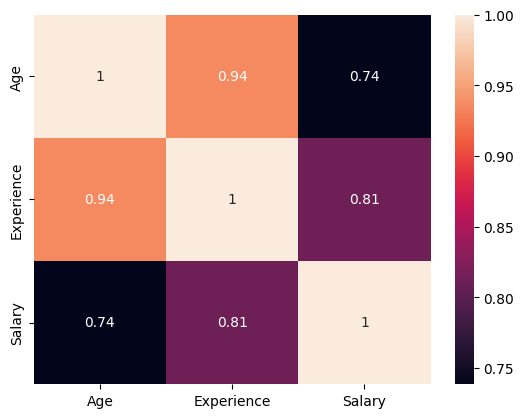

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr,annot=True)
plt.show()

Para varivéis qualitativas, é possível gerar histogramas de frequência para cada classe para analisar se há diferenças significativas entre os histogramas. Além disto, é possível gerar gráficos de colunas ou barras com os valores médios e boxplots para analisar a variância dos valores em cada classe.

Análise do impacto do atributo gênero no atributo salário.

Apresente a tabela, o gráfico de barras e o box plot com o salário médio por gênero

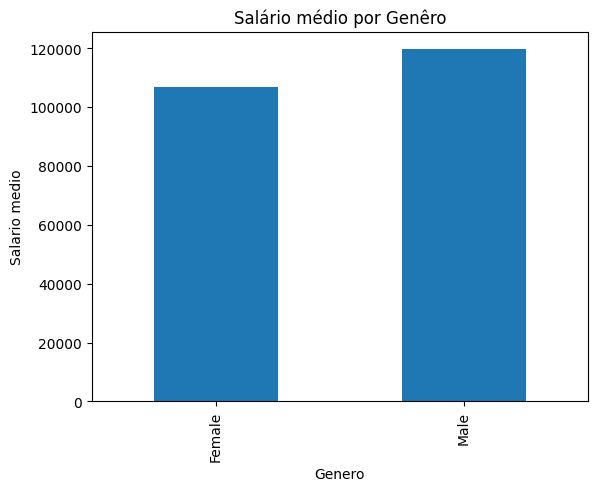

In [19]:
agrupadoFuncao = df.groupby(['Gender'])
salarioAgrupadoFuncao = agrupadoFuncao['Salary'].mean()
salarioAgrupadoFuncao
salarioAgrupadoFuncao.plot.bar('Gender')
plt.title('Salário médio por Genêro')
plt.xlabel('Genero')
plt.ylabel('Salario medio')
plt.show()

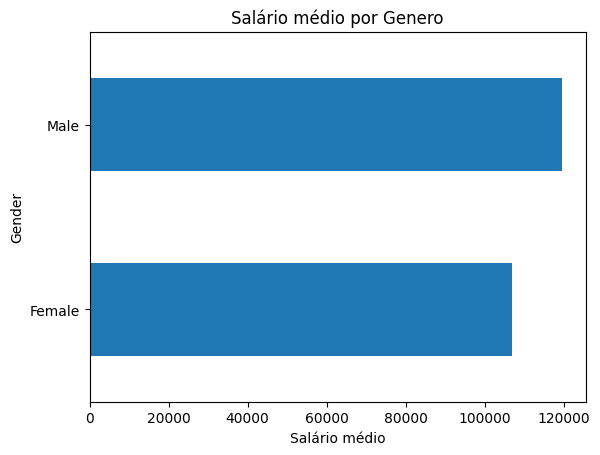

In [20]:
salarioAgrupadoFuncao.plot.barh('Gender')
plt.title('Salário médio por Genero')
plt.xlabel('Salário médio')
plt.ylabel('Gender')
plt.show()

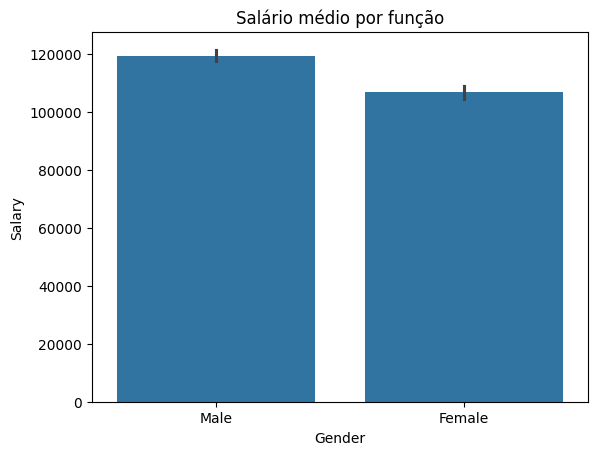

In [21]:
sns.barplot(x='Gender',y='Salary',data=df)
plt.title('Salário médio por função')
plt.show()

Apresente o histograma de frequência do salário de cada gênero.

In [15]:
agrupadoFuncao = df.groupby(['Gender'])
salarioAgrupadoFuncao = agrupadoFuncao['Salary'].mean()
salarioAgrupadoFuncao

Gender
Female    106807.706285
Male      119543.285354
Name: Salary, dtype: float64

Análise do impacto do atributo nível educacional no atributo salário.

Apresente a tabela, o gráfico de barras e o box plot com o salário médio por nível educacional.

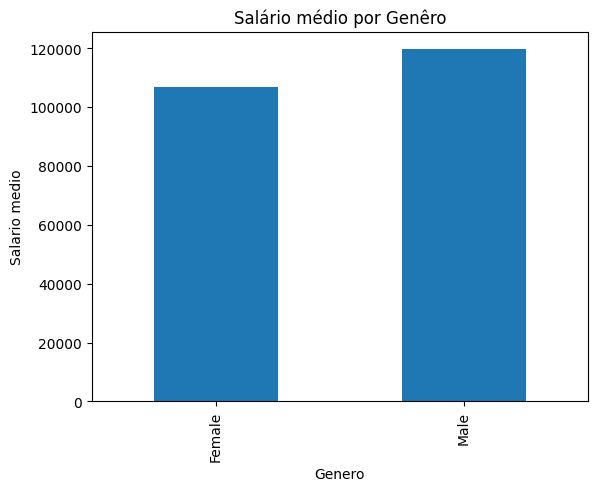

In [23]:
salarioAgrupadoFuncao.plot.bar('Gender')
plt.title('Salário médio por Genêro')
plt.xlabel('Genero')
plt.ylabel('Salario medio')
plt.show()

Criação de histogramas de frequência do atributo salário, separados por país para facilitar a visualização.

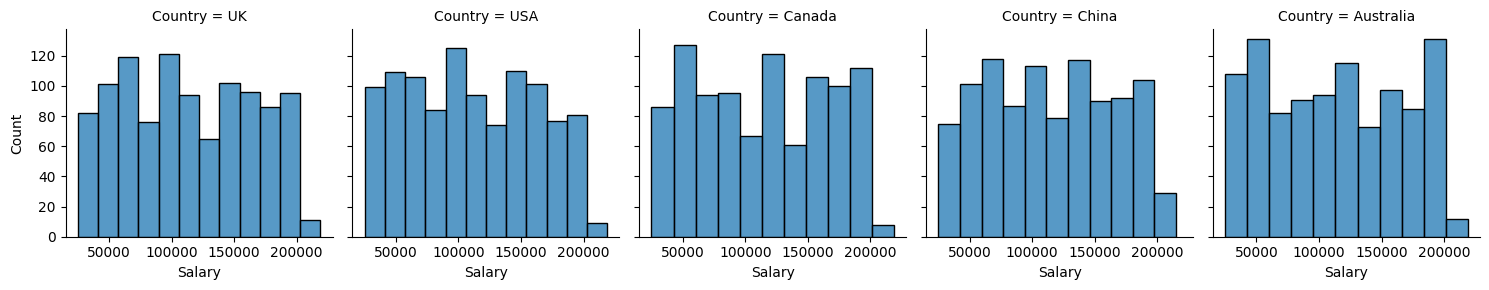

In [24]:
grafico = sns.FacetGrid(df6, col = "Country")
grafico.map(sns.histplot, "Salary")
plt.show ()

Parte 5 Seleção de atributos usando a abordagem de Wrapper com base em medidas de ganho de informação.

Crie uma cópia do dataframe original chamada df7, realize a codificação dos atributos categóricos utilizando o LabelEncoder e apresente o dataframe gerado. Por fim, treine um modelo com todos os atributos e apresente o r2 para comparações futuras.

Cálcule o ganho de informação de todos os atributos utilizando uma árvore de regressão.

Criação e avaliação dos modelos, utilzando o método forward.

Crie um modelo apenas com o atributo tempo de experiência

Crie um modelo apenas com os atributos tempo de experiência e idade


Como o incremento no resultado foi baixo, pode-se concluir que não vale a pena incluir outros atributos no modelo. Mas sabe-se que isto ocorreu porque os atributos idade e experiência tem alta correlação. A inclusão do próximo atributo conforme seu ganho de informação (nível educacional) pode melhorar os resultados, mas tal informação não estaria disponível se fosse usado apenas o ganho de informação.

Crie um modelo apenas com os atributos tempo de experiência, idade e nível educacional. Houve melhora com a inclusão do novo atributo?

Parte 6 Seleção de atributos usando a abordagem de Filtro com base no método selectKBest

In [25]:
df8 = df.copy()
le = LabelEncoder()
df8['Gender']=le.fit_transform(df8['Gender'])
df8['Education']=le.fit_transform(df8['Education'])
df8['Country']=le.fit_transform(df8['Country'])
df8['Race']=le.fit_transform(df8['Race'])
df8

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,1,0,5.0,90000.0,3,9
1,28.0,0,2,3.0,65000.0,4,5
2,45.0,1,3,15.0,150000.0,1,9
3,36.0,0,0,7.0,60000.0,4,5
4,52.0,1,2,20.0,200000.0,4,1
...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1
6699,49.0,0,3,20.0,200000.0,3,7
6700,32.0,1,1,3.0,50000.0,0,2
6701,30.0,0,0,4.0,55000.0,2,4


O método selectKbest seleciona os k atributos mais relevantes, conforme o resultado de testes estatísticos.

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

seletor = SelectKBest(score_func=f_regression, k=3)

X = df8.drop(['Salary'] ,axis='columns')
y = df8['Salary']
seletor.fit_transform(X,y)

print('Todos os campos')
print(X.columns)

print('Campos selecionados')
filter = seletor.get_support()
print(X.columns[filter])

Todos os campos
Index(['Age', 'Gender', 'Education', 'Experience', 'Country', 'Race'], dtype='object')
Campos selecionados
Index(['Age', 'Education', 'Experience'], dtype='object')


Treinamento do modelo com todos os atributos para comparação.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df8.drop(['Salary'] ,axis='columns')
y = df8['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6607095299161199


Treinamento do modelo com os atributos idade, nível educacional e tempo de experiência.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df8.drop(['Salary','Race','Country','Gender'] ,axis='columns')
y = df8['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6565173393835538


Parte 7 Seleção de atributos usando a abordagem Wrapper com base na classe RFE.

In [29]:
df9 = df.copy()
le = LabelEncoder()
df9['Gender']=le.fit_transform(df9['Gender'])
df9['Education']=le.fit_transform(df9['Education'])
df9['Country']=le.fit_transform(df9['Country'])
df9['Race']=le.fit_transform(df9['Race'])
df9

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,1,0,5.0,90000.0,3,9
1,28.0,0,2,3.0,65000.0,4,5
2,45.0,1,3,15.0,150000.0,1,9
3,36.0,0,0,7.0,60000.0,4,5
4,52.0,1,2,20.0,200000.0,4,1
...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1
6699,49.0,0,3,20.0,200000.0,3,7
6700,32.0,1,1,3.0,50000.0,0,2
6701,30.0,0,0,4.0,55000.0,2,4


In [30]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df9.drop(['Salary'] ,axis='columns')
y = df9['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

estimator =  linear_model.LinearRegression()
seletor = RFE(estimator, n_features_to_select=3, step=1)
seletor.fit(X, y)

print(X.columns)
print(seletor.ranking_)

Index(['Age', 'Gender', 'Education', 'Experience', 'Country', 'Race'], dtype='object')
[2 1 1 1 3 4]


Treinamento do modelo com os campos sugeridos pelo RFE (Gênero, Nível Educacional e Experiência).

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df9.drop(['Salary','Age','Race','Country'] ,axis='columns')
y = df9['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6512733735104881
